In [1]:
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import cifar10
import  tensorflow.keras.layers as L
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from tensorflow.keras.regularizers import l2, l1



In [2]:
tf.test.gpu_device_name()

''

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
type(train_images), len(train_images), len(test_images)

(numpy.ndarray, 50000, 10000)

In [5]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
n_labels=list(set(train_labels.flatten()))
print(f" количество labels : {len(n_labels)}, варианты labels : {n_labels}")

 количество labels : 10, варианты labels : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


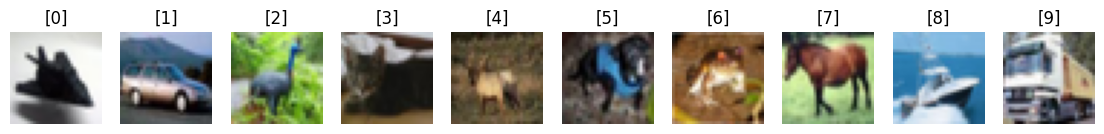

In [7]:
fig, axs = plt.subplots(1, 10, figsize = (14,5))
for i in n_labels:
    for image, label in zip(train_images, train_labels):
        if i==label:
            axs.flat[i].imshow(image)
            axs.flat[i].axis("off")
            axs.flat[i].set_title(label)
            break

In [8]:
dict_labels = {
    0 : "самолет",
    1 : "машина",
    2: "птица",
    3 : "кошка",
    4 : "олень",
    5: "собака",
    6: "лягушка",
    7: "лошадь",
    8: "корабль",
    9: "грузовик"}

In [9]:
normalizer = L.Normalization()
normalizer.adapt(train_images)
train_images_normalized = normalizer(train_images)
test_images_normalized = normalizer(test_images)
train_labels_oh = tf.keras.utils.to_categorical(train_labels)
test_labels_oh = tf.keras.utils.to_categorical(test_labels)

In [10]:
train_images_normalized[1]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 0.4554948 ,  0.8705223 ,  1.0963905 ],
        [ 0.01100253,  0.2262828 ,  0.33182892],
        [-0.32236668, -0.30521482, -0.28281862],
        ...,
        [-0.5446128 , -0.45016873, -0.64261234],
        [-0.6081117 , -0.53069866, -0.64261234],
        [-0.7351095 , -0.67565256, -0.65760374]],

       [[ 0.23324867,  0.5967205 ,  0.82654524],
        [ 0.31262228,  0.4839786 ,  0.6016742 ],
        [-0.0048722 ,  0.03301094,  0.06198365],
        ...,
        [-0.4652392 , -0.38574475, -0.53767246],
        [-0.76685894, -0.6917586 , -0.77753496],
        [-0.8621073 , -0.80450046, -0.79252636]],

       [[ 0.23324867,  0.5161906 ,  0.7515882 ],
        [ 0.21737394,  0.37123668,  0.5267172 ],
        [-0.16361943, -0.12804896, -0.02796477],
        ...,
        [-0.7351095 , -0.65954655, -0.74755216],
        [-0.90973145, -0.8528184 , -0.8824748 ],
        [-0.9256062 , -0.86892444, -0.8824748 ]],

       ...,

       

In [11]:
train_labels_oh[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [47]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(L.InputLayer(shape = (32, 32, 3)))
model.add(L.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(L.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(L.MaxPooling2D(2,2))
model.add(L.Dropout(0.25))
model.add(L.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(L.Conv2D(filters=64, kernel_size= (3,3), padding="same", activation="relu"))
model.add(L.MaxPooling2D(2,2))
model.add(L.Dropout(0.25))
model.add(L.Flatten())
model.add(L.Dense(units=256, activation="relu"))
model.add(L.Dropout(0.5))
model.add(L.Dense(units = 10, activation="softmax"))

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,234 (4.14 MB)

 Trainable params: 1,084,234 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
tf.keras.backend.clear_session()
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [50]:
model_fitted = model.fit(train_images_normalized, train_labels_oh, batch_size=32, epochs=100, shuffle=True, validation_data=(test_images_normalized, test_labels_oh),
                         callbacks=[EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True, mode = "max")])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4725 - loss: 1.4586 - val_accuracy: 0.6077 - val_loss: 1.1095
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6161 - loss: 1.0807 - val_accuracy: 0.6876 - val_loss: 0.8770
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6684 - loss: 0.9481 - val_accuracy: 0.7090 - val_loss: 0.8384
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6977 - loss: 0.8610 - val_accuracy: 0.7292 - val_loss: 0.7834
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7185 - loss: 0.7991 - val_accuracy: 0.7392 - val_loss: 0.7514
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7341 - loss: 0.7584 - val_accuracy: 0.7510 - val_loss: 0.7117
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7503 - loss: 0.7181 - val_accuracy: 0.7561 - val_loss: 0.6976
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 

In [51]:
prediction = model.predict(test_images_normalized)
cm = confusion_matrix(test_labels, np.argmax((prediction), axis = 1))
print(accuracy_score(test_labels, np.argmax((prediction), axis = 1)))
print(classification_report(test_labels, np.argmax((prediction), axis = 1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.7793
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.90      0.88      0.89      1000
           2       0.70      0.63      0.67      1000
           3       0.63      0.53      0.58      1000
           4       0.75      0.77      0.76      1000
           5       0.65      0.77      0.70      1000
           6       0.76      0.88      0.81      1000
           7       0.85      0.82      0.84      1000
           8       0.87      0.87      0.87      1000
           9       0.86      0.88      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [52]:
model_fitted.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

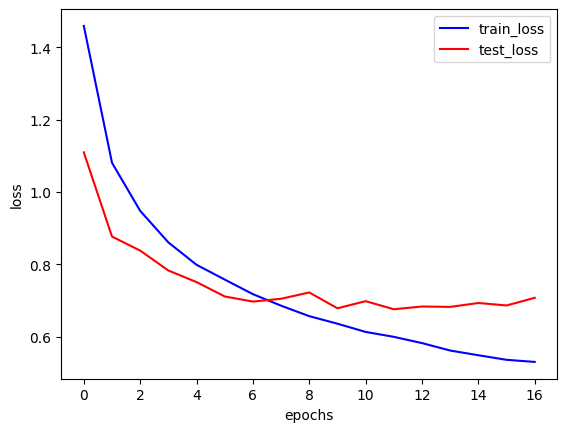

In [53]:
plt.plot(range(len(model_fitted.history["loss"])), model_fitted.history["loss"], color = "blue", label = "train_loss")
plt.plot(range(len(model_fitted.history["loss"])), model_fitted.history["val_loss"], color = "red", label = "test_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

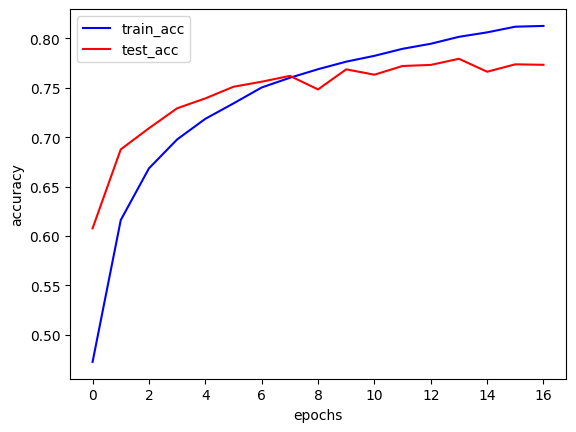

In [54]:
plt.plot(range(len(model_fitted.history["loss"])), model_fitted.history["accuracy"], color = "blue", label = "train_acc")
plt.plot(range(len(model_fitted.history["loss"])), model_fitted.history["val_accuracy"], color = "red", label = "test_acc")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [55]:
df_cm = pd.DataFrame(cm, index = [f"true_{n}" for n in dict_labels.values()], columns = [f"pred_{n}" for n in dict_labels.values()]).T
df_cm

,true_самолет,true_машина,true_птица,true_кошка,true_олень,true_собака,true_лягушка,true_лошадь,true_корабль,true_грузовик
pred_самолет,768,10,47,14,9,6,4,8,42,16
pred_машина,15,876,1,5,1,1,1,0,25,49
pred_птица,63,3,634,59,38,38,31,23,11,3
pred_кошка,22,7,46,534,39,102,39,25,18,13
pred_олень,19,2,82,52,769,35,17,47,6,3
pred_собака,6,4,67,216,41,765,20,60,5,1
pred_лягушка,9,10,85,73,59,18,880,11,9,6
pred_лошадь,11,3,27,27,33,30,4,822,4,7
pred_корабль,55,13,9,9,8,2,3,1,867,24
pred_грузовик,32,72,2,11,3,3,1,3,13,878


In [56]:
max_errors = 0
max_pred = 0
max_true = 0
for column in df_cm.columns.tolist():
    a = df_cm[column].sort_values(ascending = False).iloc[1]
    b = df_cm[column].sort_values(ascending = False).index[1]
    if a>max_errors:
        max_errors = a
        max_true = column
        max_pred = b
    print(f" {column} чаще всего {a} раз модель путала с {b}")
print(f"чаще всего {max_errors} раз модель путала {max_true} и {max_pred}") 
    

 true_самолет чаще всего 63 раз модель путала с pred_птица
 true_машина чаще всего 72 раз модель путала с pred_грузовик
 true_птица чаще всего 85 раз модель путала с pred_лягушка
 true_кошка чаще всего 216 раз модель путала с pred_собака
 true_олень чаще всего 59 раз модель путала с pred_лягушка
 true_собака чаще всего 102 раз модель путала с pred_кошка
 true_лягушка чаще всего 39 раз модель путала с pred_кошка
 true_лошадь чаще всего 60 раз модель путала с pred_собака
 true_корабль чаще всего 42 раз модель путала с pred_самолет
 true_грузовик чаще всего 49 раз модель путала с pred_машина
чаще всего 216 раз модель путала true_кошка и pred_собака


In [58]:
del model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(L.InputLayer(shape = (32, 32, 3)))
model.add(L.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu")) #kernel_regularizer=l2(0.0001)))
model.add(L.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")) #kernel_regularizer=l2(0.001)))
model.add(L.MaxPooling2D(2,2))
model.add(L.Dropout(0.25))
model.add(L.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")) #kernel_regularizer=l2(0.0001)))
model.add(L.Conv2D(filters=64, kernel_size= (3,3), padding="same", activation="relu")) #kernel_regularizer=l2(0.0001)))
model.add(L.MaxPooling2D(2,2))
model.add(L.Dropout(0.25))
model.add(L.Flatten())
model.add(L.Dense(units=256, activation="relu", kernel_regularizer=l2(0.0001)))
model.add(L.Dropout(0.5))
model.add(L.Dense(units = 10, activation="softmax"))

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,234 (4.14 MB)

 Trainable params: 1,084,234 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
tf.keras.backend.clear_session()
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
model_fitted = model.fit(train_images_normalized, train_labels_oh, batch_size=32, epochs=100, shuffle=True,  validation_data=(test_images_normalized, test_labels_oh),
                         callbacks=[EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True, mode = "max")])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4827 - loss: 1.4942 - val_accuracy: 0.6038 - val_loss: 1.2091
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6269 - loss: 1.1703 - val_accuracy: 0.6844 - val_loss: 1.0269
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6748 - loss: 1.0712 - val_accuracy: 0.7179 - val_loss: 0.9708
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7006 - loss: 1.0156 - val_accuracy: 0.7436 - val_loss: 0.9148
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7210 - loss: 0.9809 - val_accuracy: 0.7512 - val_loss: 0.9124
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7353 - loss: 0.9499 - val_accuracy: 0.7485 - val_loss: 0.9205
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7458 - loss: 0.9377 - val_accuracy: 0.7599 - val_loss: 0.9090
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 

In [61]:
prediction = model.predict(test_images_normalized)
cm = confusion_matrix(test_labels, np.argmax((prediction), axis = 1))
print(accuracy_score(test_labels, np.argmax((prediction), axis = 1)))
print(classification_report(test_labels, np.argmax((prediction), axis = 1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.7965
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.92      0.87      0.90      1000
           2       0.75      0.68      0.71      1000
           3       0.62      0.62      0.62      1000
           4       0.75      0.76      0.76      1000
           5       0.68      0.76      0.72      1000
           6       0.83      0.85      0.84      1000
           7       0.86      0.84      0.85      1000
           8       0.87      0.90      0.88      1000
           9       0.86      0.89      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [63]:
df_cm = pd.DataFrame(cm, index = [f"true_{n}" for n in dict_labels.values()], columns = [f"pred_{n}" for n in dict_labels.values()]).T
max_errors = 0
max_pred = 0
max_true = 0
for column in df_cm.columns.tolist():
    a = df_cm[column].sort_values(ascending = False).iloc[1]
    b = df_cm[column].sort_values(ascending = False).index[1]
    if a > max_errors:
        max_errors = a
        max_true = column
        max_pred = b
    print(f" {column} чаще всего {a} раз модель путала с {b}")
print(f"чаще всего {max_errors} раз модель путала {max_true} и {max_pred}") 

 true_самолет чаще всего 64 раз модель путала с pred_корабль
 true_машина чаще всего 69 раз модель путала с pred_грузовик
 true_птица чаще всего 80 раз модель путала с pred_олень
 true_кошка чаще всего 181 раз модель путала с pred_собака
 true_олень чаще всего 62 раз модель путала с pred_кошка
 true_собака чаще всего 136 раз модель путала с pred_кошка
 true_лягушка чаще всего 41 раз модель путала с pred_кошка
 true_лошадь чаще всего 56 раз модель путала с pred_собака
 true_корабль чаще всего 29 раз модель путала с pred_самолет
 true_грузовик чаще всего 39 раз модель путала с pred_машина
чаще всего 181 раз модель путала true_кошка и pred_собака


In [68]:
augmentantions = [L.RandomFlip("horizontal"), L.RandomContrast(factor=[0.01, 0.1]), L.RandomRotation(0.02)]

In [69]:

for i in augmentantions:
    del model
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential()
    model.add(L.InputLayer(shape = (32, 32, 3)))
    model.add(i)
    model.add(L.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(L.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(L.MaxPooling2D(2,2))
    model.add(L.Dropout(0.25))
    model.add(L.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(L.Conv2D(filters=64, kernel_size= (3,3), padding="same", activation="relu"))
    model.add(L.MaxPooling2D(2,2))
    model.add(L.Dropout(0.25))
    model.add(L.Flatten())
    model.add(L.Dense(units=256, activation="relu", kernel_regularizer=l2(0.0001)))
    model.add(L.Dropout(0.5))
    model.add(L.Dense(units = 10, activation="softmax"))
    model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
    model_fitted = model.fit(train_images_normalized, train_labels_oh, batch_size=32, epochs=100, shuffle=True,  validation_data=(test_images_normalized, test_labels_oh),
                             callbacks=[EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True, mode = "max")])
    print(f" для аугментации {i} лучшая точность {max(model_fitted.history["val_accuracy"])}")

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.4778 - loss: 1.4991 - val_accuracy: 0.6169 - val_loss: 1.1454
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6194 - loss: 1.1764 - val_accuracy: 0.6938 - val_loss: 0.9803
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6654 - loss: 1.0839 - val_accuracy: 0.7045 - val_loss: 0.9782
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6894 - loss: 1.0350 - val_accuracy: 0.7275 - val_loss: 0.9298
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7075 - loss: 0.9972 - val_accuracy: 0.7511 - val_loss: 0.8844
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7204 - loss: 0.9747 - val_accuracy: 0.7534 - val_loss: 0.8854
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7296 - loss: 0.9560 - val_accuracy: 0.7672 - val_loss: 0.8579
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 